##### $\hspace{15pt}$ **Filename: csvVsParquetFiles.ipynb**
##### $\hspace{1.5pt}$ **Date Created: July 10, 2024**
##### **Date Modified: July 17, 2024**
##### $\rule{10.45in}{1pt}$
##### **Compare the file sizes and read times of csv and parquet files that store randomly-generated dataframes.**

##### **Before running this notebook in Colab, either change the path to the folder where the csv and parquet files will be saved, or create the subfolder `/Colab Notebooks/017_csvVsParquetFiles` in your Google drive.**

##### $\rule{10.45in}{1pt}$

##### Load modules and packages.

In [1]:
from google.colab import drive
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import random
import string
import sys
import time

##### Mount Google Drive to Colab.

In [2]:
drive.mount("/content/gdrive")

Mounted at /content/gdrive


##### Set the path to save the files generated by this notebook.

In [3]:
path = "gdrive/MyDrive/Colab Notebooks/017_csvVsParquetFiles/"

##### Define a function that generates a random dataframe with 150 columns of integer, float, and object data types.

In [4]:
def generateDataframe(nRows):
    "Generate a random dataframe with 150 columns of integer, float, and object data types."

    data1 = np.array([random.randint(-100, 100) for _ in range(nRows*50)]).reshape(-1, 50)
    df1 = pd.DataFrame(data1, columns = ["x" + str(i) for i in range(50)])

    data2 = np.array([random.uniform(-100, 100) for _ in range(nRows*50)]).reshape(-1, 50)
    df2 = pd.DataFrame(data2, columns = ["x" + str(i) for i in range(50, 100)])

    def generateString():
        "Generate a random string with 5 alphanumeric characters."

        return ''.join(random.choice(string.ascii_lowercase + string.digits) for _ in range(5))

    data3 = np.array([generateString() for _ in range(nRows*50)]).reshape(-1,50)
    df3 = pd.DataFrame(data3, columns = ["x" + str(i) for i in range(100, 150)])

    df = pd.concat([df1, df2, df3], axis = 1)
    columns = df.columns.tolist()
    random.shuffle(columns)
    df = df[columns]
    df.columns = ["x" + str(i) for i in range(150)]

    return df

##### Save 10 randomly-generated dataframes with 150 columns and increasing number of rows in csv and parquet files.

In [5]:
nRows = []
csvFilenames = []
csvFileSizes = []
parquetFilenames = []
parquetFileSizes = []
np.random.seed(1)

for i in range(1, 11):

    nRows.append(10000*i)
    df = generateDataframe(10000*i)

    if i < 10:

       csvFilename = "testData0" + str(i) + ".csv"
       parquetFilename = "testData0" + str(i) + ".parquet"

    else:

       csvFilename = "testData10.csv"
       parquetFilename = "testData10.parquet"

    csvFilenames.append(csvFilename)
    df.to_csv(path + csvFilename)
    csvFileSize = math.ceil(os.path.getsize(path + csvFilename)/(1024*1024))
    csvFileSizes.append(csvFileSize)

    parquetFilenames.append(parquetFilename)
    df.to_parquet(path + parquetFilename)
    parquetFileSize = math.ceil(os.path.getsize(path + parquetFilename)/(1024*1024))
    parquetFileSizes.append(parquetFileSize)

##### Plot the sizes of the csv and parquet files against the number of rows of the dataframes.

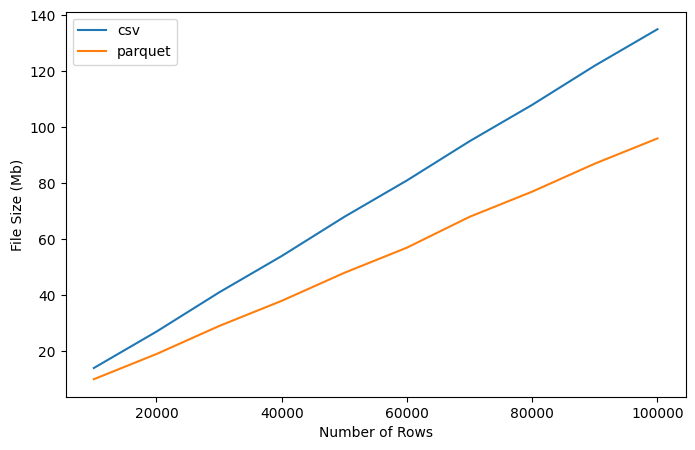

In [6]:
plt.rcParams["figure.figsize"] = [8, 5]
plt.plot(nRows, csvFileSizes)
plt.plot(nRows, parquetFileSizes)
plt.xlabel("Number of Rows")
plt.ylabel("File Size (Mb)")
plt.legend(["csv", "parquet"], loc ="upper left")
plt.show()

##### Record the times it takes to read each of the 10 csv files and 10 parquet files.

In [7]:
readCsvTimeDelta = []
readParquetTimeDelta = []

for i in range(1, 11):

    if i < 10:

       csvFilename = "testData0" + str(i) + ".csv"
       parquetFilename = "testData0" + str(i) + ".parquet"

    else:

       csvFilename = "testData10.csv"
       parquetFilename = "testData10.parquet"

    t1 = time.time()
    df1 = pd.read_csv(path + csvFilename)
    t2 = time.time()
    readCsvTimeDelta.append(t2 - t1)

    t1 = time.time()
    df2 = pd.read_parquet(path + parquetFilename)
    t2 = time.time()
    readParquetTimeDelta.append(t2 - t1)

##### Plot the times it takes to read  the csv and parquet files against the number of rows of the dataframes.

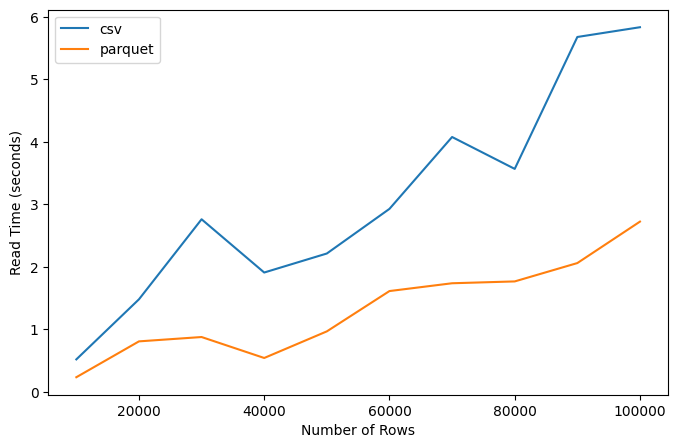

In [8]:
plt.plot(nRows, readCsvTimeDelta)
plt.plot(nRows, readParquetTimeDelta)
plt.xlabel("Number of Rows")
plt.ylabel("Read Time (seconds)")
plt.legend(["csv", "parquet"], loc ="upper left")
plt.show()